# Keras를 이용한 손글씨 인식 딥러닝
- Tensorflow로 작성된 프로그램은 sklearn Library를 사용할때 보다 어렵다.
- Keras는 머신러닝 라이브러리 테아노(Theano)와 Tensorflow를 Wrapping한 라이브러리

In [3]:
import pandas as pd
train = pd.read_csv("../Data/train_20k.csv", header=None)
test = pd.read_csv("../Data/test_1k.csv", header=None)
print(train.head())
print(test.head())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0

In [4]:
#null
train.isnull().sum().sum()

0

In [5]:
test.isnull().sum().sum()

0

In [20]:
train[1:]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19999,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# train과 test를 Feature와 Target으로 분리하고 정규화하기
train_label = train.loc[:, train.columns == 0]
train_data = train.loc[:, train.columns != 0]
train_data = train_data /255

test_label = test.loc[:, test.columns == 0]
test_data = test.loc[:, test.columns != 0]
test_data = test_data /255

print(train_label[0:5])
print(train_data[0:5])
print("*"*30)
print(test_label[0:5])
print(test_data[0:5])

   0
0  5
1  0
2  4
3  1
4  9
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]
******************************
   0
0  7
1  2
2  1
3  0
4  4
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

### Deep Learning Model 만들기

In [40]:
# GPU 상ㅇ 설정
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [41]:
from tensorflow import keras

In [42]:
# 입력층 784 은닉층 512 출력층 10(노드의 갯수) softmax , optimizer : adam

model = keras.Sequential()
model.add(keras.layers.Dense(512, activation ='relu', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation= 'softmax'))

In [78]:
from pickletools import optimize
from sklearn import metrics

from sklearn.metrics import log_loss

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [79]:
# 데이터 훈련하기
import numpy as np

model.fit(
    train_data, train_label, epochs=50
)

Epoch 1/50
626/626 [==============================] - 3s 4ms/step - loss: 0.3138 - accuracy: 0.9076
Epoch 2/50
626/626 [==============================] - 2s 3ms/step - loss: 0.1284 - accuracy: 0.9634
Epoch 3/50
626/626 [==============================] - 2s 4ms/step - loss: 0.0792 - accuracy: 0.9759
Epoch 4/50
626/626 [==============================] - 2s 4ms/step - loss: 0.0643 - accuracy: 0.9806
Epoch 5/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0337 - accuracy: 0.9905
Epoch 6/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0213 - accuracy: 0.9944
Epoch 7/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0175 - accuracy: 0.9955
Epoch 8/50
626/626 [==============================] - 2s 3ms/step - loss: 0.0141 - accuracy: 0.9963
Epoch 9/50
626/626 [==============================] - 2s 4ms/step - loss: 0.0101 - accuracy: 0.9973
Epoch 10/50
626/626 [==============================] - 2s 4ms/step - loss: 0.0143 - accuracy: 0.9958

---
### 테스트 데이터로 평가하기

In [80]:
score = model.evaluate(test_data, test_label)
print("loss :", score[0])
print("accuracy :", score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9800
loss : 0.12870648503303528
accuracy : 0.9800199866294861


---
### test_data로 predict해보기

In [81]:
pred = model.predict(test_data)
print("test label :", test_label[:10])
print("pred :",np.argmax(pred[:10], axis = 1))

32/32 [==============================] - 0s 2ms/step
test label :    0
0  7
1  2
2  1
3  0
4  4
5  1
6  4
7  9
8  5
9  9
pred : [7 2 1 0 4 1 4 9 6 9]


In [82]:
pred[:10]

array([[3.72311140e-23, 3.71156847e-23, 1.06678200e-17, 3.50485808e-12,
        3.24455775e-30, 5.77985172e-25, 1.80004973e-30, 1.00000000e+00,
        9.36358841e-21, 6.56851200e-20],
       [8.42166644e-19, 2.93216162e-13, 1.00000000e+00, 1.94765887e-11,
        2.98405955e-30, 8.87339701e-19, 3.78407962e-23, 7.90530529e-25,
        7.93697086e-18, 2.83378985e-29],
       [3.63433970e-15, 9.99999285e-01, 7.22802554e-07, 1.34567201e-11,
        2.05000059e-10, 5.41812636e-11, 7.18786272e-12, 2.10460609e-08,
        8.25617852e-10, 1.29526065e-15],
       [1.00000000e+00, 8.49692967e-24, 2.08713897e-11, 2.16449708e-19,
        2.67033082e-19, 3.00750504e-18, 2.28024565e-12, 5.24614515e-15,
        1.04390106e-23, 4.73026735e-15],
       [3.64552806e-18, 7.22400194e-23, 1.97273105e-18, 1.08466384e-19,
        1.00000000e+00, 1.30904318e-19, 2.01051310e-17, 3.48018699e-14,
        1.20410748e-13, 3.87013666e-09],
       [8.89650714e-20, 1.00000000e+00, 2.60958182e-12, 1.79250637e-14,
   

---
### 번외
: Image 만들기

In [83]:
from PIL import Image

In [84]:
# 0번의 정답을 제외한 데이터 만들기
train1 = train.loc[:, train.columns != 0]
train1.shape

(20001, 784)

In [85]:
# train_data의 50번의 크기 조절하기
abc = np.array(train1.iloc[50]).reshape(28, 28)
abc.shape

(28, 28)

In [86]:
# Image 만들기
image = Image.fromarray((abc).astype(np.uint8))
image

In [87]:
# image 저장하기
image.save("../Data/mnist_test3.jpg","JPEG")

---
## 이미지 불러서 Predict 해보기

In [88]:
# Image 불러오기
img = Image.open("../Data/mnist_test3.jpg")
img

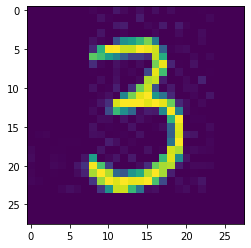

In [89]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [90]:
# image를 numpy 배열로 변환
imgArray = np.array(img)
imgArray = imgArray / 255
imgArray.shape

(28, 28)

In [91]:
# image를 1차원 배열로 변환
    # 계산하기 싫으면 -1 , 원래는 reshape(784)
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [92]:
# tolist() : numpy 배열이 python 배열로 바뀜
imgArray3 = imgArray2.tolist()

In [93]:
dfArray = pd.DataFrame(imgArray3)
dfArray = dfArray.T

In [94]:
dfArray

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
print("예측값 :", np.argmax(model.predict(dfArray), axis=1))

1/1 [==============================] - 0s 22ms/step
예측값 : [3]


In [96]:
model.predict(dfArray)

1/1 [==============================] - 0s 22ms/step


array([[5.3616798e-19, 3.1615440e-14, 1.5792051e-13, 1.0000000e+00,
        8.0608096e-21, 1.3496643e-08, 1.2453069e-25, 1.6576587e-21,
        4.1873630e-16, 6.7057776e-11]], dtype=float32)